# Testing packages

In [807]:
#%pip install '/dbfs/mnt/users/Shared EU/Python/whl_files/mofr/mofr-1.0-py3-none-any.whl'

In [808]:
import pandas as pd
import numpy as np
import random

In [809]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metrics

## Simple scores

In [810]:
from mofr import metrics

In [811]:
df=pd.read_csv('Model_Eval_Data_For_Andrej.csv')

In [812]:
df['p_churn']=df['p_alive']*-1+1
df['target_obs']=1
df['random_score']=np.random.randint(1, 1000000, df.shape[0])/1000000
df['semi_random_score']=0.7*df['p_churn']+0.3*np.random.normal(0,1,df.shape[0])
df['month']=df['target_obs'].apply(lambda x: random.choice([202001,202002,202003]))

In [813]:
len(df)

7946

In [814]:
df.head()

,TECCOMPCE,TECSOLDTO,p_alive,CLV,p_alive_,PB_Churn_Flag,CLV_,ob,omx,omn,...,CreditBlock,Churn,a,b,target,target_obs,p_churn,random_score,semi_random_score,month
0,40,636362,0.994196,2821.981425,0,994196067.0,0,2821,981425.0,11,...,2020-09-29 00:00:00.0000000,2019-10-01 00:00:00.0000000,NaN,0.0,0,1,0.005804,0.959261,-0.334581,202001
1,40,441577,0.613307,0.000000,0,613306736.0,0,0,1.0,2018-10-01 00:00:00.0000000,...,NaN,NaN,1.0,NaN,1,1,0.386693,0.691548,0.873365,202002
2,40,422141,0.462324,3340.062341,0,462324357.0,1,3340,62341.0,7,...,2020-07-01 00:00:00.0000000,2020-02-19 00:00:00.0000000,NaN,0.0,0,1,0.537676,0.960932,0.434490,202001
3,40,706342,0.841013,5023.797898,0,841012858.0,0,5023,797898.0,17,...,2020-07-17 00:00:00.0000000,2019-10-03 00:00:00.0000000,NaN,0.0,0,1,0.158987,0.368807,0.588091,202002
4,40,718698,0.668060,0.000000,0,668060235.0,0,0,1.0,2019-02-06 00:00:00.0000000,...,2020-01-10 00:00:00.0000000,NaN,0.0,NaN,0,1,0.331940,0.860672,0.319466,202003


### Accuracy

In [815]:
metrics.accuracy_score(df['target'], df['p_churn']>0.5)

0.7793858545179965

In [816]:
[metrics.accuracy_score(df['target'], df['p_churn']>(x+1)/1000) for x in range(20)]

[0.31059652655424114,
 0.40057890762647874,
 0.46967027435187514,
 0.5117040020135918,
 0.5485779008306066,
 0.5690913667253964,
 0.591492574880443,
 0.6063428139944627,
 0.618801912912157,
 0.6303800654417316,
 0.6401963251950668,
 0.6477472942360937,
 0.6552982632771206,
 0.6614648879939592,
 0.6676315127107979,
 0.6720362446513969,
 0.676566826076013,
 0.6827334507928517,
 0.6867606342813994,
 0.6906619682859301]

In [817]:
#metrics.accuracy_score?

### Precision

In [818]:
metrics.precision_score(df['target'], df['p_churn']>0.5)

0.5398230088495575

In [819]:
[metrics.precision_score(df['target'], df['p_churn']>(99-x)/100) for x in range(20)]

[0.6588235294117647,
 0.6239316239316239,
 0.625,
 0.618421052631579,
 0.6073619631901841,
 0.6123595505617978,
 0.6096256684491979,
 0.6062176165803109,
 0.6019417475728155,
 0.591304347826087,
 0.5887096774193549,
 0.5889328063241107,
 0.5923076923076923,
 0.6,
 0.5949820788530465,
 0.5929824561403508,
 0.5932203389830508,
 0.5907590759075908,
 0.6006191950464397,
 0.600609756097561]

In [820]:
#metrics.precision_score?

### Recall

In [821]:
metrics.recall_score(df['target'], df['p_churn']>0.5)

0.20254565578306585

In [822]:
[metrics.recall_score(df['target'], df['p_churn']>(99-x)/100) for x in range(20)]

[0.03099059214167128,
 0.040398450470392915,
 0.04703929164360819,
 0.05201992252351965,
 0.05478693967902601,
 0.06032097399003874,
 0.0630879911455451,
 0.06474820143884892,
 0.06862202545655784,
 0.0752628666297731,
 0.08079690094078583,
 0.08245711123408965,
 0.08522412838959602,
 0.0896513558384062,
 0.09186496956281129,
 0.09352517985611511,
 0.09684560044272275,
 0.09905921416712783,
 0.10736026563364692,
 0.10902047592695074]

In [823]:
#metrics.recall_score?

### F1 score

In [824]:
metrics.f1_score(df['target'], df['p_churn']>0.5)

0.2945674044265594

In [825]:
[metrics.f1_score(df['target'], df['p_churn']>(x+1)/1000) for x in range(20)]

[0.39749230092388915,
 0.4314193625402889,
 0.46057347670250887,
 0.48072805139186287,
 0.5000696864111499,
 0.5107173478136611,
 0.5233480176211454,
 0.5313155528918191,
 0.5383325712543819,
 0.545144804088586,
 0.5509659180147636,
 0.5550786838340487,
 0.5590082112381259,
 0.5628859278518037,
 0.5664094565752751,
 0.5691137566137566,
 0.5709515859766277,
 0.5755177639333221,
 0.5776344815883251,
 0.5796853625170998]

In [826]:
#metrics.f1_score?

### Confusion matrix

In [827]:
metrics.confusion_matrix(df['target'], df['p_churn']>0.5)

array([[5827,  312],
       [1441,  366]], dtype=int64)

### ROC AUC

In [828]:
metrics.roc_auc_score(df['target'], df['p_churn'])

0.8560895967276451

In [829]:
#metrics.roc_auc_score?

### GINI

In [830]:
metrics.gini(df['target'], df['p_churn'], average='samples')

0.7121791934552901

In [831]:
#metrics.gini?

### Lift

In [832]:
metrics.lift(df['target'], df['p_churn'])

2.306531204644412

In [833]:
metrics.liftN(df['target'], df['p_churn'], 0.05)

2.519081294685937

In [834]:
[metrics.liftN(df['target'], df['p_churn'],(x+1)/10) for x in range(1,10)]

[2.564655037052907,
 2.418539014941893,
 2.1267203306629034,
 1.8638627559490868,
 1.6290557813709337,
 1.4191355404598403,
 1.2478854756975628,
 1.111484123653658,
 1]

### KS score

In [835]:
metrics.ks_score(df['target'], df['p_churn'])

0.588206908879903

## Curves and others

### ROC curve

In [836]:
metrics.roc_curve(df['target'], df['p_churn'])

(array([0.        , 0.        , 0.        , ..., 0.99788239, 0.99837107,
        1.        ]),
 array([0.00000000e+00, 5.53403431e-04, 7.74764804e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([          inf, 1.0000000e+00, 9.9999814e-01, ..., 1.7253500e-04,
        1.7186300e-04, 1.5661200e-04]))

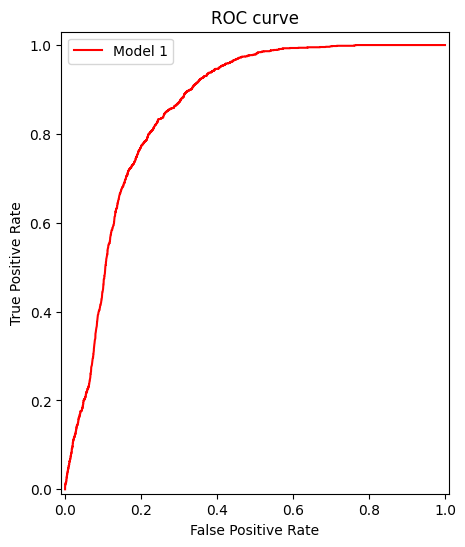

In [837]:
from matplotlib import pyplot as plt
_fpr, _tpr, _ = metrics.roc_curve(df['target'], df['p_churn'])

# plot the roc curve for the model
plt.plot(_fpr, _tpr, linestyle='-', color='red', label='Model 1')

# axis labels
plt.title('ROC curve')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.03)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [838]:
#metrics.roc_curve?

### Lift curve

In [839]:
[metrics.liftN(df['target'], df['p_churn'], x/10) for x in range (1,11)]

[2.306531204644412,
 2.564655037052907,
 2.418539014941893,
 2.1267203306629034,
 1.8638627559490868,
 1.6290557813709337,
 1.4191355404598403,
 1.2478854756975628,
 1.111484123653658,
 1]

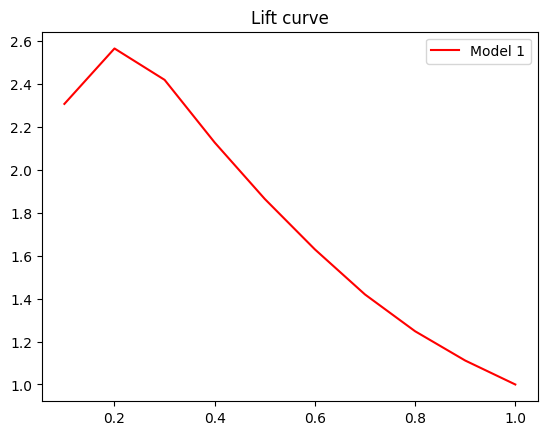

In [840]:
from matplotlib import pyplot as plt
x= [(x/10) for x in range (1,11)]
lift_curve = [metrics.liftN(df['target'], df['p_churn'], x/10) for x in range (1,11)]
plt.plot(x, lift_curve, linestyle='-', color='red', label='Model 1')
# axis labels
plt.title('Lift curve')
#plt.xlim(-0.01,1.01)
#plt.ylim(-0.01,1.03)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision-Recall curve

In [841]:
metrics.precision_recall_curve(df['target'], df['p_churn'])

(array([0.22741002, 0.22743864, 0.22746727, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.10680686e-03, 5.53403431e-04, 0.00000000e+00]),
 array([1.56612e-04, 1.58298e-04, 1.61780e-04, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00]))

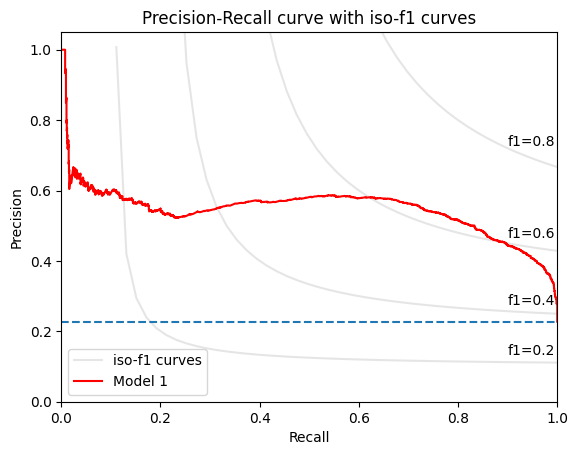

In [842]:
from matplotlib import pyplot as plt


f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')

lr_precision, lr_recall, _ = metrics.precision_recall_curve(df['target'], df['p_churn'])
# plot the precision-recall curves
no_skill = len(df['target'][df['target']==1]) / len(df['target'])
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
l,=plt.plot(lr_recall, lr_precision,linestyle='-', color='red', label='Model 1')
lines.append(l)
labels.append('Model 1')
# axis labels
plt.title('Precision-Recall curve with iso-f1 curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# show the legend
plt.legend(lines,labels)
# show the plot
plt.show()


# Basic Evaluators

## Lift Curve Evaluator

In [843]:
from mofr.basic_evaluators.LiftCurve import LiftCurveEvaluator

lce=LiftCurveEvaluator()
#help(lce)

In [844]:
lce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

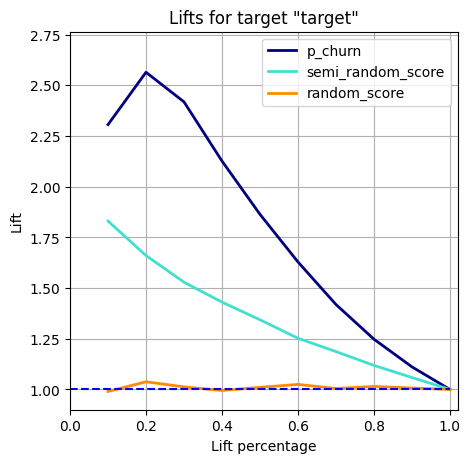

In [845]:
lce.get_graph()

## ROC Curve Evaluator

In [846]:
from mofr.basic_evaluators.ROCCurve import ROCCurveEvaluator

rce=ROCCurveEvaluator()
#help(rce)

In [847]:
rce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

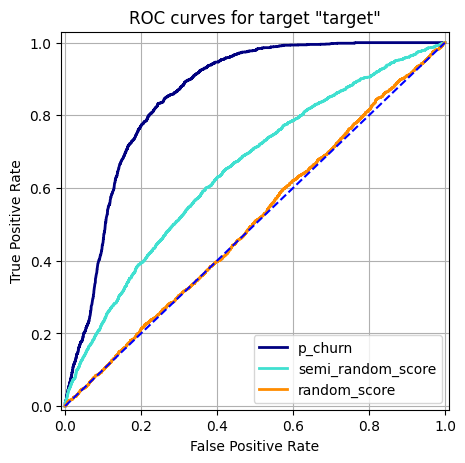

In [848]:
rce.get_graph()

## PR Curve Evaluator

In [849]:
from mofr.basic_evaluators.PRCurve import PRCurveEvaluator

prce=PRCurveEvaluator()
#help(prce)

In [850]:
prce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

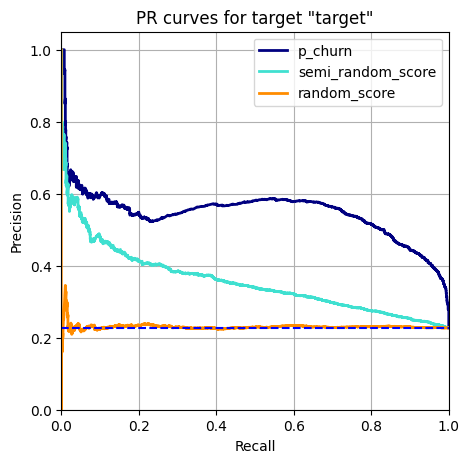

In [851]:
prce.get_graph()

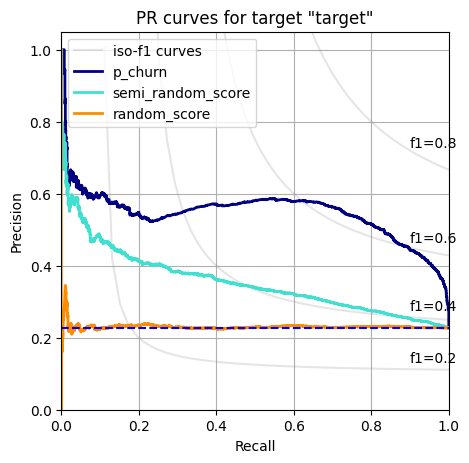

In [852]:
prce.get_graph(isocurves='on')

## Gini in Time Evaluator

In [853]:
from mofr.basic_evaluators.GiniInTime import GiniInTimeEvaluator

gite=GiniInTimeEvaluator()
#help(gite)

In [854]:
gite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

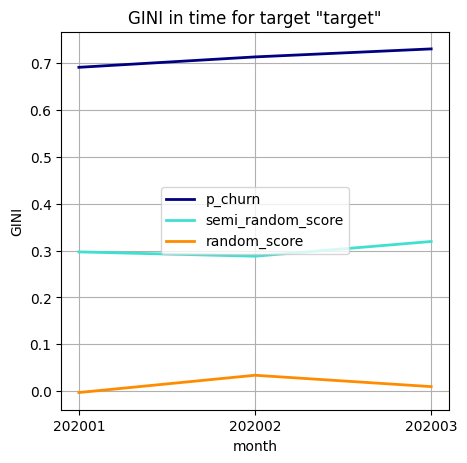

In [855]:
gite.get_graph()

In [856]:
gite.get_table()
gite.table

,p_churn,semi_random_score,random_score
month,,,
202001,0.691542,0.297276,-0.003086
202002,0.713760,0.288087,0.033825
202003,0.730861,0.319515,0.009543
All,0.712179,0.302287,0.012921


## Lift in Time Evaluator

In [857]:
from mofr.basic_evaluators.LiftInTime import LiftInTimeEvaluator

lite=LiftInTimeEvaluator()
#help(lite)

In [858]:
lite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

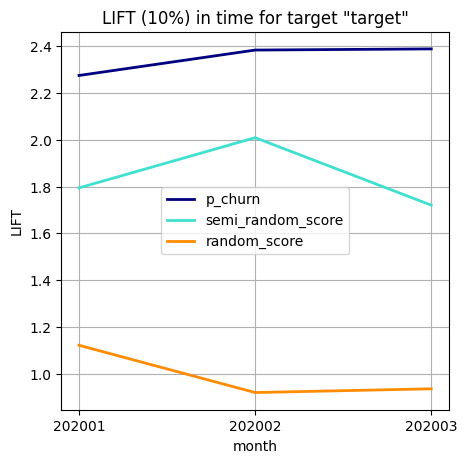

In [859]:
lite.get_graph()

In [860]:
lite.get_table()
lite.table

,p_churn,semi_random_score,random_score
month,,,
202001,2.275009,1.794374,1.121483
202002,2.383669,2.009093,0.919415
202003,2.388597,1.720458,0.935395
All,2.306531,1.830844,0.990094


## KS in Time Evaluator

In [861]:
from mofr.basic_evaluators.KSInTime import KSInTimeEvaluator

kite=KSInTimeEvaluator()
#help(kite)

In [862]:
kite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

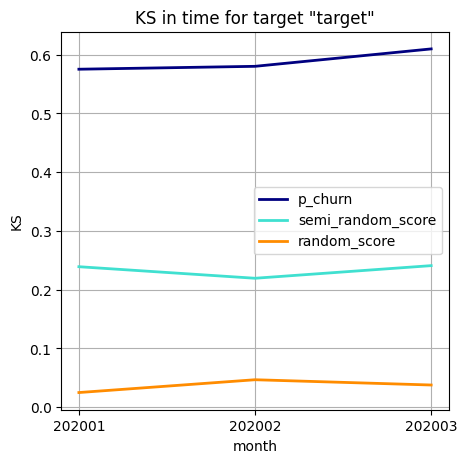

In [863]:
kite.get_graph()

In [864]:
kite.get_table()
kite.table

,p_churn,semi_random_score,random_score
month,,,
202001,0.575366,0.239201,0.025011
202002,0.580294,0.219539,0.046805
202003,0.609941,0.241021,0.037833
All,0.588207,0.229889,0.024296


## StabilityInTimeCategorical Evaluator

In [865]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [866]:
from mofr.basic_evaluators.StabilityInTimeCategorical import StabilityInTimeCategoricalEvaluator

sitcae=StabilityInTimeCategoricalEvaluator()
#help(sitcae)

In [867]:
sitcae.d(df).pc('categorical_predictor').tc('month')

C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\StabilityInTimeCategorical.py:69: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_['one'], rownames=None, colnames=None, aggfunc=sum, margins=False, margins_name='All', dropna=True, normalize='columns').transpose()


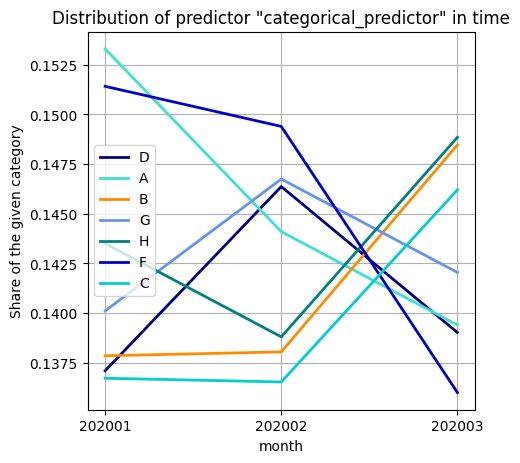

In [868]:
sitcae.get_graph()

In [869]:
sitcae.get_table()
sitcae.table

C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\StabilityInTimeCategorical.py:128: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_['one'], rownames=None, colnames=None, aggfunc=sum, margins=False, margins_name='All', dropna=True, normalize='columns').transpose()


categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.153296,0.137853,0.136723,0.137100,0.151412,0.140113,0.143503
202002,0.144100,0.138048,0.136536,0.146369,0.149395,0.146747,0.138805
202003,0.139403,0.148470,0.146203,0.139025,0.136003,0.142048,0.148848


## StabilityInTimeContinuous Evaluator

In [870]:
from mofr.basic_evaluators.StabilityInTimeContinuous import StabilityInTimeContinuousEvaluator

sitcoe=StabilityInTimeContinuousEvaluator()
#help(sitcoe)

In [871]:
sitcoe.d(df).pc('p_churn').tc('month')

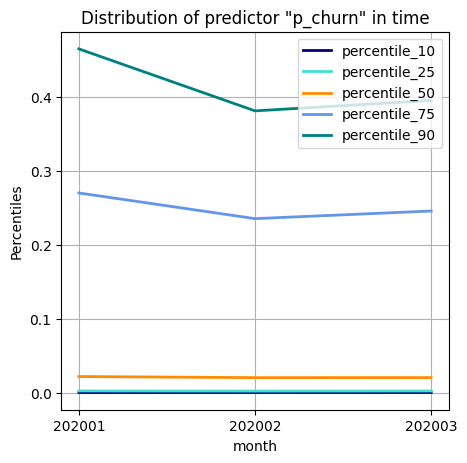

In [872]:
sitcoe.get_graph()

In [873]:
sitcoe.get_table()
sitcoe.table

,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
month,,,,,
202001,0.001111,0.003271,0.022697,0.270065,0.464238
202002,0.001141,0.003049,0.021187,0.235483,0.380714
202003,0.001170,0.003208,0.021251,0.245773,0.394738


## HistogramCategorical Evaluator

In [874]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [875]:
from mofr.basic_evaluators.HistogramCategorical import HistogramCategoricalEvaluator

hcae=HistogramCategoricalEvaluator()
#help(hcae)

In [876]:
hcae.d(df).pc('categorical_predictor')

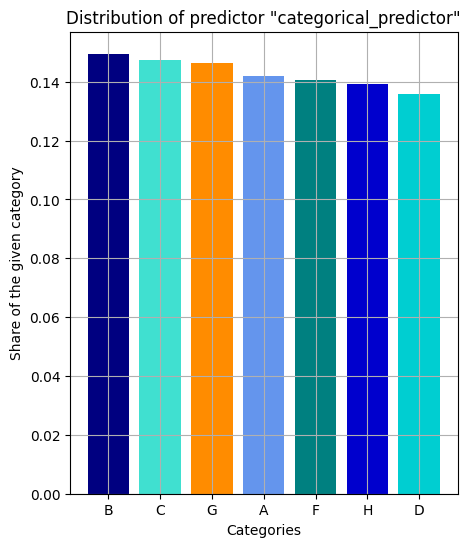

In [877]:
hcae.get_graph()

In [878]:
hcae.get_table()
hcae.table

,proportion %,count
categorical_predictor,,
B,0.149509,1188
C,0.147244,1170
G,0.146237,1162
A,0.141832,1127
F,0.140448,1116
H,0.139064,1105
D,0.135666,1078


## HistogramContinuous Evaluator

In [879]:
from mofr.basic_evaluators.HistogramContinuous import HistogramContinuousEvaluator

hcoe=HistogramContinuousEvaluator()
#help(hcoe)

In [880]:
hcoe.d(df).pc('p_churn')

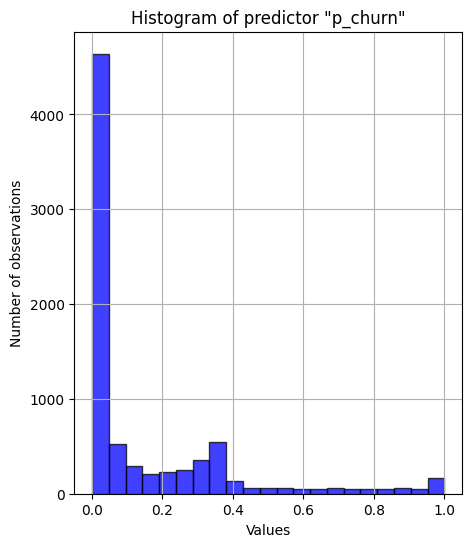

In [881]:
hcoe.get_graph()

In [882]:
hcoe.get_table()
hcoe.table

,p_churn
percentile_10,0.001139
percentile_25,0.003166
percentile_50,0.021627
percentile_75,0.247600
percentile_90,0.401849


## TargetAssociationCategorical Evaluator

In [883]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [884]:
from mofr.basic_evaluators.TargetAssociationCategorical import TargetAssociationCategoricalEvaluator

tacae=TargetAssociationCategoricalEvaluator()
#help(tacae)

In [885]:
tacae.d(df).t([('target', 'target_obs')]).pc('categorical_predictor').tc('month')

C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\TargetAssociationCategorical.py:78: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_[target_[0]], rownames=None, colnames=None, aggfunc=sum, margins=False, margins_name='All', dropna=True, normalize='columns').transpose()


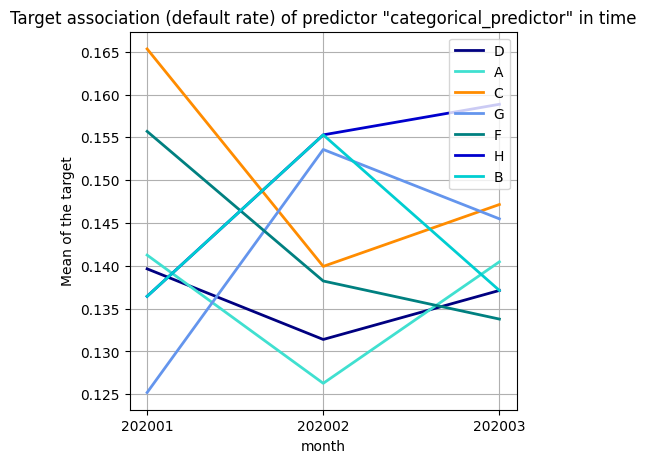

In [886]:
tacae.get_graph()

In [887]:
tacae.get_table()
tacae.table

C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\TargetAssociationCategorical.py:126: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_[target_[0]], rownames=None, colnames=None, aggfunc=sum, margins=True, margins_name='All', dropna=True, normalize='columns').transpose()
C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\TargetAssociationCategorical.py:126: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_[target_[0]], rowna

categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.141252,0.136437,0.165329,0.139647,0.155698,0.125201,0.136437
202002,0.126280,0.155290,0.139932,0.131399,0.138225,0.153584,0.155290
202003,0.140468,0.137124,0.147157,0.137124,0.133779,0.145485,0.158863
All,0.136137,0.142778,0.151079,0.136137,0.142778,0.141118,0.149972


## TargetAssociationContinuous Evaluator

In [888]:
from mofr.basic_evaluators.TargetAssociationContinuous import TargetAssociationContinuousEvaluator

tacoe=TargetAssociationContinuousEvaluator()
#help(tacoe)

In [889]:
tacoe.d(df).t([('target', 'target_obs')]).pc('random_score').tc('month')

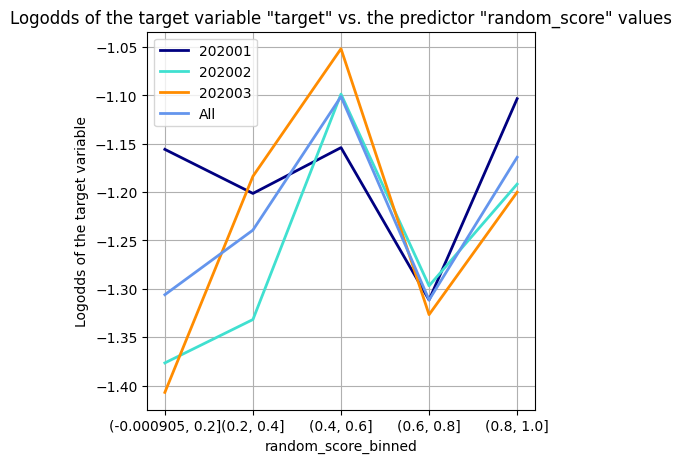

In [890]:
tacoe.get_graph()

In [891]:
tacoe.get_table()
tacoe.table

# Complex evaluators

## Categorical Predictor Evaluator

In [892]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [893]:
from mofr.complex_evaluators.CategoricalPredictor import CategoricalPredictorEvaluator

capre=CategoricalPredictorEvaluator()
#help(capre)

In [894]:
capre.d(df).t([('target', 'target_obs')]).pc('categorical_predictor').tc('month')

C:\Users\andrej\Projects\mofr\mofr\complex_evaluators\CategoricalPredictor.py:92: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_['one'], rownames=None, colnames=None, aggfunc=sum, margins=False, margins_name='All', dropna=True, normalize='columns').transpose()
C:\Users\andrej\Projects\mofr\mofr\complex_evaluators\CategoricalPredictor.py:119: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_[target_[0]], rownames=None, colname

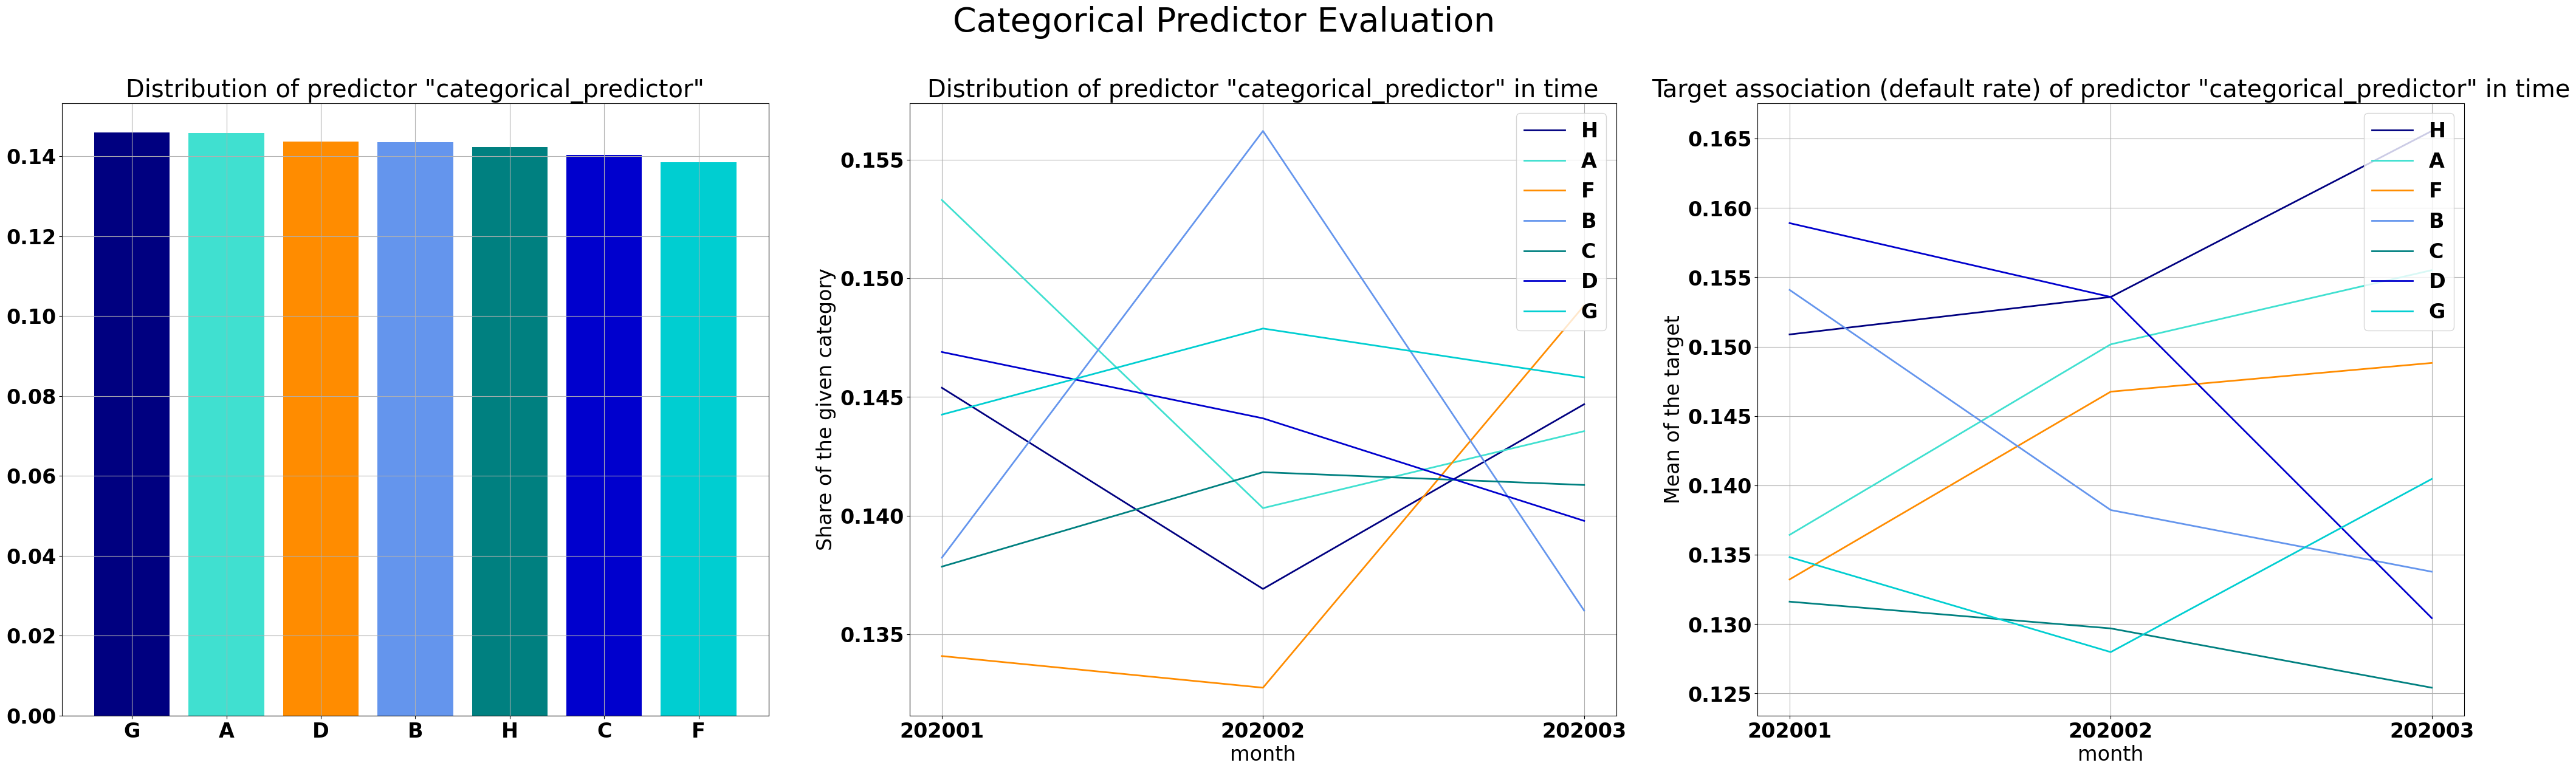

In [895]:
capre.get_graph()

In [896]:
capre.get_table()

,proportion %,count
categorical_predictor,,
G,0.145985,1160
A,0.145734,1158
D,0.143594,1141
B,0.143468,1140
H,0.142336,1131
C,0.140322,1115
F,0.138560,1101


C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\StabilityInTimeCategorical.py:128: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_['one'], rownames=None, colnames=None, aggfunc=sum, margins=False, margins_name='All', dropna=True, normalize='columns').transpose()


categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.153296,0.138230,0.137853,0.146893,0.134087,0.144256,0.145386
202002,0.140318,0.156203,0.141831,0.144100,0.132753,0.147882,0.136914
202003,0.143559,0.136003,0.141292,0.139781,0.148848,0.145825,0.144692


C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\TargetAssociationCategorical.py:126: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_[target_[0]], rownames=None, colnames=None, aggfunc=sum, margins=True, margins_name='All', dropna=True, normalize='columns').transpose()
C:\Users\andrej\Projects\mofr\mofr\basic_evaluators\TargetAssociationCategorical.py:126: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  crosstab_=pd.crosstab(index=df_[self.predictor_column], columns=df_[self.time_column], values=df_[target_[0]], rowna

categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.136437,0.154093,0.131621,0.158909,0.133226,0.134831,0.150883
202002,0.150171,0.138225,0.129693,0.153584,0.146758,0.127986,0.153584
202003,0.155518,0.133779,0.125418,0.130435,0.148829,0.140468,0.165552
All,0.147205,0.142225,0.128943,0.147759,0.142778,0.134477,0.156613


# Misc

In [897]:
pd.cut(df['target'], bins=5)

0       (-0.001, 0.2]
1          (0.8, 1.0]
2       (-0.001, 0.2]
3       (-0.001, 0.2]
4       (-0.001, 0.2]
            ...      
7941    (-0.001, 0.2]
7942    (-0.001, 0.2]
7943       (0.8, 1.0]
7944    (-0.001, 0.2]
7945    (-0.001, 0.2]
Name: target, Length: 7946, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 0.2] < (0.2, 0.4] < (0.4, 0.6] < (0.6, 0.8] < (0.8, 1.0]]

In [898]:
df['p_churn_binned']=pd.cut(df['p_churn'], bins=5)

In [899]:
pd.crosstab(index=df['p_churn_binned'], columns=df['month'], values=df['target'], rownames=None, colnames=None, aggfunc=['count','sum','mean',logodds_], margins=True, margins_name='All', dropna=True, normalize=False)

NameError: name 'logodds_' is not defined

In [ ]:
def logodds_(x):
    mean_=np.mean(x)
    if mean_==1.0:
        return -10.0
    if mean_==0.0:
        return 10.0
    else:
        a=np.log(mean_/(1-mean_))
        return a
    

pd.crosstab(index=df['p_churn_binned'], columns=df['month'], values=df['target'], rownames=None, colnames=None, aggfunc=['count','sum','mean',logodds_], margins=True, margins_name='All', dropna=True, normalize=False)

In [ ]:
a[a.columns[0]].index

In [ ]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [ ]:
pd.crosstab(index=df['categorical_predictor'], columns=df['month'], values=df['target'], rownames=None, colnames=None, aggfunc=sum, margins=True, margins_name='All', dropna=True, normalize='columns').transpose()

In [ ]:
df['categorical_predictor'].value_counts(dropna=False, normalize=True).plot.bar(color=['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

In [ ]:
a=df['categorical_predictor'].value_counts(dropna=False, normalize=True)
a

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 8))

# the histogram of the data
n, bins, patches = plt.hist(df['p_churn'], bins='doane', density=False, facecolor='b', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [ ]:
a.values

In [ ]:
list(df[self.predictor_column].unique())

In [ ]:
l, = plt.plot(a['A'])


#set plotting parameters
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.ticklabel_format(useOffset=False)
plt.xticks(range(min(a.index), max(a.index)+1))
#plt.xlim(min(_x)-0.1,max(_x)+0.1)
#plt.ylim(-0.01,1.03)
plt.xlabel('Month')
plt.ylabel('GINI')


plt.show()    

In [ ]:
a['A']